# This is a crowd counting project

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

## 1. Load and Preprocess the Images

In [3]:
import os
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

# Define the directory containing images
image_dir = "data/UoB_Graduation_Ceremony_Day"

# Fetch all image files in the directory
image_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir)
              if os.path.isfile(os.path.join(image_dir, f)) and
              os.path.splitext(f)[1].lower() in image_extensions]

print(f"Found {len(image_paths)} images in the directory.")

# Load the pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")

# Function to count persons in an image
def count_persons(image):
    results = model(image, conf=0.1, verbose=False)
    person_count = 0
    for result in results:
        for box in result.boxes:
            class_id = int(box.cls)
            if model.names[class_id] == "person":
                person_count += 1
    return person_count

# Select a subset of images (e.g., first 5 images)
subset_size = 10
subset_image_paths = image_paths[:subset_size]

# Process images and count persons
person_counts = []
for idx, image_path in enumerate(subset_image_paths):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (1280, 720))
    person_count = count_persons(image)
    person_counts.append(person_count)
    print(f"Image: {os.path.basename(image_path)} | Detected Persons: {person_count}")

    # Get annotated image
    results = model(image, verbose=False)
    annotated_image = results[0].plot()

    # Display the annotated image individually
    cv2.imshow(f"Annotated Image {idx + 1}", annotated_image)
    cv2.waitKey(0)

# Create a blank canvas to combine images
grid_size = (1, subset_size)  # Adjust based on the number of images (rows, columns)
stamp_size = (300, 300)  # Size of each small image
canvas = np.zeros((stamp_size[0] * grid_size[0], stamp_size[1] * grid_size[1], 3), dtype=np.uint8)

# Combine annotated images into a grid
for idx, image_path in enumerate(subset_image_paths):
    image = cv2.imread(image_path)
    results = model(image, verbose=False)
    annotated_image = results[0].plot()
    resized_image = cv2.resize(annotated_image, stamp_size)
    row = idx // grid_size[1]
    col = idx % grid_size[1]
    canvas[row * stamp_size[0]:(row + 1) * stamp_size[0],
           col * stamp_size[1]:(col + 1) * stamp_size[1]] = resized_image

# Display the combined canvas
# cv2.imshow("Combined Annotated Images", canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()


Found 301 images in the directory.


ModuleNotFoundError: No module named '_lzma'

Step 2: Crowd Counting with a Pretrained Model

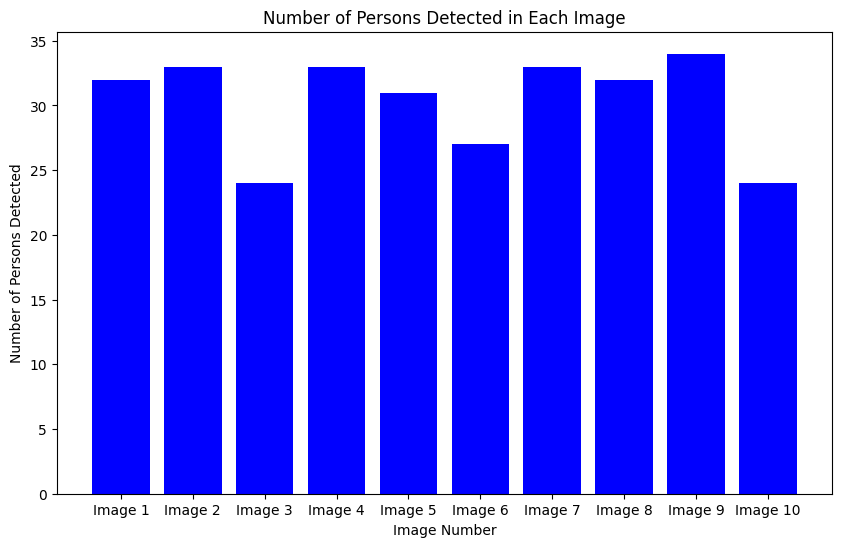

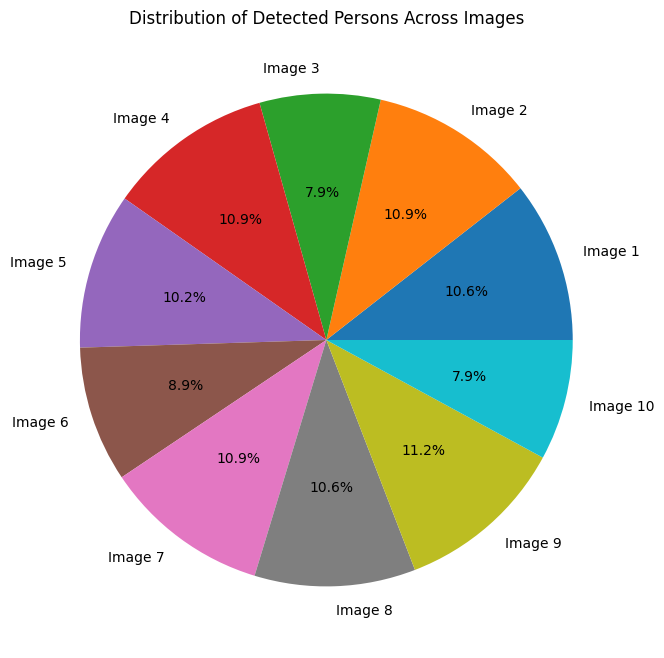

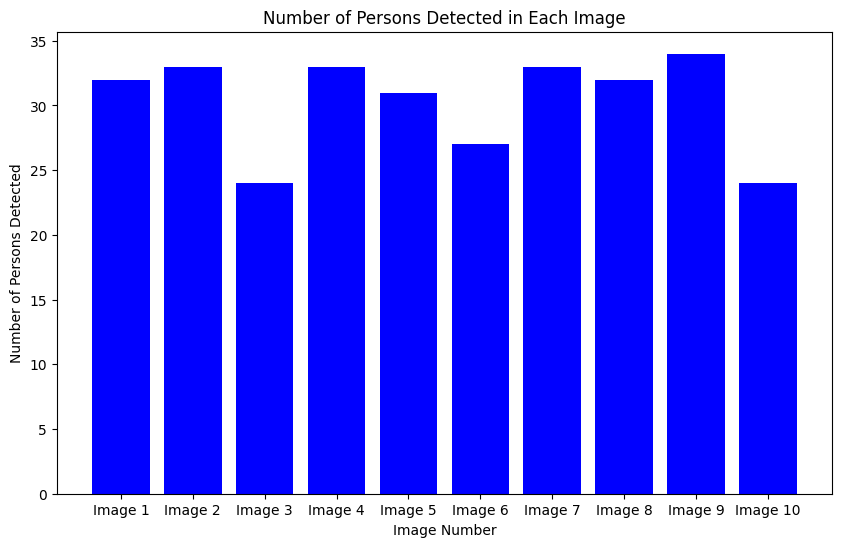

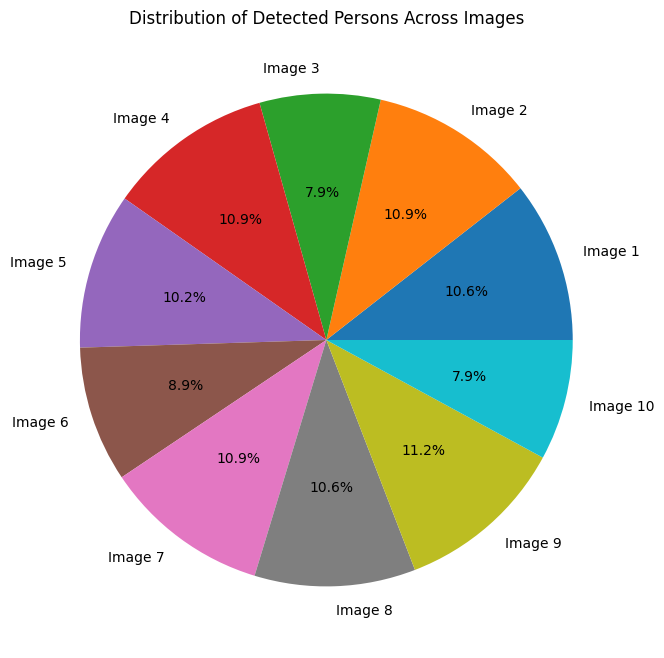

In [10]:
# Visualizations
import matplotlib.pyplot as plt
# Visualizations
plt.figure(figsize=(10, 6))
plt.bar(range(len(subset_image_paths)), person_counts, color='blue')
plt.xlabel('Image Number')
plt.ylabel('Number of Persons Detected')
plt.title('Number of Persons Detected in Each Image')
plt.xticks(range(len(subset_image_paths)), [f"Image {i+1}" for i in range(len(subset_image_paths))])
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(person_counts, labels=[f"Image {i+1}" for i in range(len(subset_image_paths))], autopct='%1.1f%%')
plt.title('Distribution of Detected Persons Across Images')
plt.show()
# Bar Chart: Person Count per Image
plt.figure(figsize=(10, 6))
plt.bar(range(len(subset_image_paths)), person_counts, color='blue')
plt.xlabel('Image Number')
plt.ylabel('Number of Persons Detected')
plt.title('Number of Persons Detected in Each Image')
plt.xticks(range(len(subset_image_paths)), [f"Image {i+1}" for i in range(len(subset_image_paths))])
plt.show()

# Pie Chart: Distribution of Detected Persons
plt.figure(figsize=(8, 8))
plt.pie(person_counts, labels=[f"Image {i+1}" for i in range(len(subset_image_paths))], autopct='%1.1f%%')
plt.title('Distribution of Detected Persons Across Images')
plt.show()

In [7]:
# # Generator to load and preprocess images
# def image_generator(image_paths, batch_size=10):
#     cumulative_count = 0  # Track cumulative count
#     for i in range(0, len(image_paths), batch_size):
#         batch_paths = image_paths[i:i + batch_size]
#         batch_images = [cv2.imread(img_path) for img_path in batch_paths]
#
#         # Resize images to a smaller resolution (e.g., 224x224)
#         resized_images = [cv2.resize(img, (224, 224)) for img in batch_images]
#         resized_images = np.array(resized_images) / 255.0  # Normalize pixel values
#
#         # Update cumulative count
#         cumulative_count += len(batch_images)
#         print(f"Processing batch of {cumulative_count} images.")
#
#         yield resized_images
#
# resized_images = next(image_generator(image_paths, batch_size=10))